# Convolutional Neural Networks

### Uses

Uses of CNNs include computer vision, natural language processing, and voice recognition. It's most popular use is in computer vision/image recognition and used in essentially all state of the art computer vision models.

### How it works

The core layer of a convolutional neural network is the convolutional layer. Unlike in dense layers, not all elements in an input are connected to all weights.

The convolution operation involves taking a filter (shown as the 3x3 shaded matrix of weight on the left) and compute the element-wise product of the filter matrix with each of its possible alignments over the input (5x5 blue matrix)

The green matrix shows the resulting product at each alignment or position

This is an example where the stride is equal to 1. If the stride were equal to 2, we would have shifted over (or down) the filter matrix to get each alignment. This would have resulted in a 2x2 matrix output instead of 3x3


![Alt Text](https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)

###### <center>Source: http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html


You can use multiple filters in a single convolutional layer. This would make the result a 3D tensor instead of a 2D one. Below is the example output when using 5 filters

![Alt Text](https://upload.wikimedia.org/wikipedia/commons/6/68/Conv_layer.png)

###### <center>Source: https://en.wikipedia.org/wiki/Convolutional_neural_network

Notice that the size of the output in the first example is smaller than the input.
The output size O will be equal to 1+ (W-K+2*P)/S where
W is the input height or width.
K is the filter height or width.
P is the size of the padding used.
S is the stride used.

Padding is a technique used to increase the dimension of the output layer, usually to achieve the same dimension as the input. It's done by "padding" the input with zeros around the edges like so:

![Alt Text](https://upload.wikimedia.org/wikipedia/commons/e/ee/Convolution_arithmetic_-_Same_padding_no_strides.gif)

###### <center>Source: http://deeplearning.net/software/theano/tutorial/conv_arithmetic.html

The second example contains an output where each channel appears to be of the same dimension as the input, let's say 5x5.
Using the formula from above, we can calculate the resulting output dimensions from the first and second examples:

Output dimensions of first example : 1 + (5-3+2*0)/1 = 3
Output dimensions of second example using padding of 1 : 1 + (5-3+2*1)/1 = 5

From this formula, we can see that
    1.) Increasing the input dimensions will increase the output dimensions
    2.) Increasing the filter dimensions will decrease the output dimensions
    3.) Increasing the padding size will increase the output dimensions
    4.) Increase the stride will decrease the output dimensions

A regularization technique we can utilize in a CNN is called max pooling.
This applies the max function to (N x N) sections of the input, where (N x N) is the pooling size.
Here's an example with a pooling size of (2 x 2)

![Alt Text](https://developers.google.com/machine-learning/practica/image-classification/images/maxpool_animation.gif)

###### <center>Source: https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

Below is an implementation of a convolutional neural network to classify 8 by 8 images of handwritten digits.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from sklearn.datasets import load_digits
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

### Load data

In [2]:
data = load_digits()

# 1500 examples in training set
# pixel intensities range from 0 to 16
# only one gray channel
# image sizes are (8, 8)
X_train = data.images[:1500].reshape(-1, 8, 8, 1) / 16
X_test = data.images[1500:].reshape(-1, 8, 8, 1) / 16

y = pd.get_dummies(data.target).values
y_train = y[:1500, :]
y_test = y[1500:, :]

### Define model

In [3]:
model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(8,8,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))
model.compile('adam', loss='mse', metrics=['accuracy'])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 8)           80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 8)           0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 8)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 2, 8)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
__________

### Train model

In [5]:
history = model.fit(X_train, y_train, batch_size=16, epochs=128, validation_split=0.1, verbose=0)

### View performance during training
- Can check for overfitting/underfitting

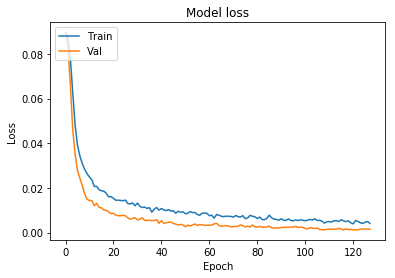

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

### Evaluation
#### MSE & overall accuracy on test set

In [7]:
y_pred = model.predict(X_test)

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.007537671753923841
Test accuracy: 0.9595959595959596


#### Confusion matrix

##### Rows are true values
##### Columns are predicted values

In [8]:
pd.DataFrame(confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

,0,1,2,3,4,5,6,7,8,9
0,25,0,0,0,1,0,1,0,0,0
1,0,31,0,0,0,0,0,0,0,0
2,0,0,27,0,0,0,0,0,0,0
3,0,0,0,30,0,0,0,0,0,0
4,0,0,0,0,30,0,0,0,0,3
5,0,1,0,0,0,29,0,0,0,0
6,0,1,0,0,0,0,29,0,0,0
7,0,0,0,0,0,0,0,30,0,0
8,0,2,0,0,0,0,0,1,25,0
9,0,0,0,1,0,1,0,0,0,29


#### Precesion, recall, f-scores & support

In [9]:
# precision: out of all the times I predicted this class, what proportion of the time was the model correct?
# recall: out of all the times this was the true class, what proportion of the time did the model predict this class?
# F-Score (or F-1 Score) = 2/(precision^(-1) + recall^(-1)) 
# Support: Number of 

pd.DataFrame(
    data = precision_recall_fscore_support(
        np.argmax(y_test, axis=1), 
        np.argmax(y_pred, axis=1)
    ),
    index = ['Precision', 'Recall', 'F-Score', 'Support']
)

,0,1,2,3,4,5,6,7,8,9
Precision,1.000000,0.885714,1.0,0.967742,0.967742,0.966667,0.966667,0.967742,1.000000,0.906250
Recall,0.925926,1.000000,1.0,1.000000,0.909091,0.966667,0.966667,1.000000,0.892857,0.935484
F-Score,0.961538,0.939394,1.0,0.983607,0.937500,0.966667,0.966667,0.983607,0.943396,0.920635
Support,27.000000,31.000000,27.0,30.000000,33.000000,30.000000,30.000000,30.000000,28.000000,31.000000
